In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the dataset
data = pd.read_csv('stock_prices.csv')
data['Close'] = data['Close'].fillna(data['Close'].mean())


# Extract the closing prices
prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_prices = scaler.fit_transform(prices)


<ipython-input-21-413709593cf6>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('stock_prices.csv')


In [ ]:
print(prices)

[[2742.        ]
 [ 571.        ]
 [3210.        ]
 ...
 [ 782.        ]
 [1612.        ]
 [2549.81502774]]


In [ ]:
print(normalized_prices)

[[0.03250528]
 [0.00658939]
 [0.03809194]
 ...
 [0.00910816]
 [0.01901613]
 [0.03021111]]


In [ ]:
# Split the data into training and testing sets
train_size = int(len(normalized_prices) * 0.8)
train_data = normalized_prices[:train_size]
test_data = normalized_prices[train_size:]

In [ ]:
# Function to create input sequences and target values
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [ ]:
# Define the window size for input sequences
window_size = 10

# Create input sequences and target values
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

In [ ]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


Exception ignored in: <function _xla_gc_callback at 0x7f2b354ca950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


29507/29507 [==============================] - 254s 7ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 2/50
29507/29507 [==============================] - 182s 6ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 3/50
29507/29507 [==============================] - 181s 6ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 4/50
29507/29507 [==============================] - 180s 6ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 5/50
29507/29507 [==============================] - 173s 6ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 6/50
29507/29507 [==============================] - 178s 6ms/step - loss: 8.4570e-04 - val_loss: 0.0013
Epoch 7/50
29507/29507 [==============================] - 189s 6ms/step - loss: 6.2442e-04 - val_loss: 9.0204e-04
Epoch 8/50
 4415/29507 [===>..........................] - ETA: 2:27 - loss: 5.5622e-04

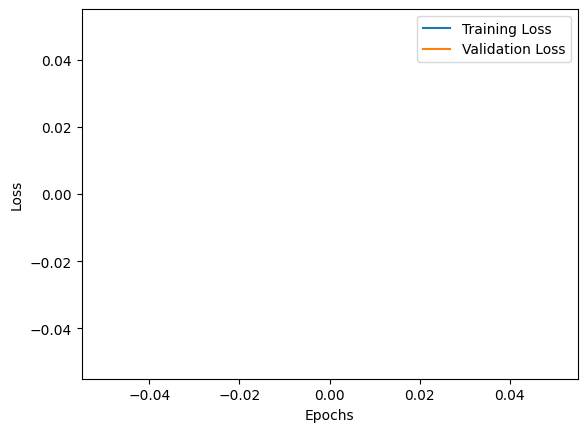

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

425/425 [==============================] - 1s 2ms/step - loss: nan
Mean Squared Error on Test Set: nan
425/425 [==============================] - 1s 2ms/step


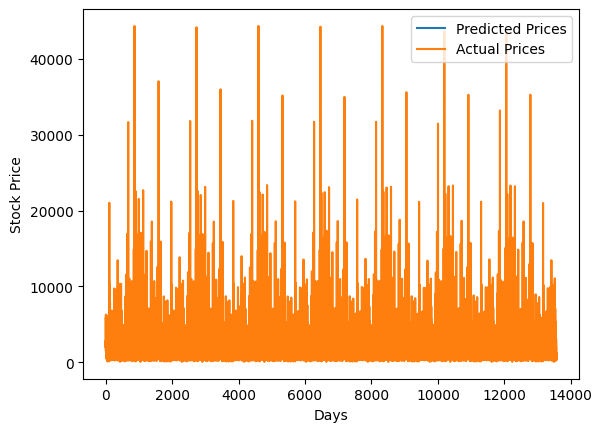

In [ ]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)

# Plot the predicted and actual prices
plt.plot(predicted_prices, label='Predicted Prices')
plt.plot(actual_prices, label='Actual Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()